In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import json

In [ ]:
df = pd.read_csv('to_use.csv')

https://www.aflowlib.org/API/aflux/?Egap(*),Egap_type(*),spinD(*),spin_atom(*),ael_debye_temperature(*),agl_heat_capacity_Cp_300K(*),agl_thermal_conductivity_300K(*),agl_thermal_expansion_300K(*),enthalpy_atom(*),Bravais_lattice_lattice_type(*),positions_fractional(*),geometry(*),density(*),Wyckoff_letters(*),Wyckoff_multiplicities(*),Wyckoff_site_symmetries(*),stoichiometry(*),valence_cell_iupac(*),kpoints_static(*),dft_type(*),energy_cutoff(*),ldau_j(*),ldau_l(*),ldau_type(*),ldau_u(*),species_pp_ZVAL(*),$paging(1,4273)

In [ ]:
df.head()

,compound,auid,aurl,spacegroup_relax,Pearson_symbol_relax,Egap,Egap_type,spinD,spin_atom,ael_debye_temperature,...,stoichiometry,valence_cell_iupac,kpoints_static,dft_type,energy_cutoff,ldau_j,ldau_l,ldau_type,ldau_u,species_pp_ZVAL
0,Ge1Ni2Zn1,aflow:00cdc20a7cbc8937,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Ge1Ni...,225,cF16,0.0,metal,"[0, 0, 0, 0]",0.0,312.886,...,"[0.25, 0.5, 0.25]",14,"[14, 14, 14]",['PAW_PBE'],574.6,"[0, 0, 0]","[0, 2, 2]",2,"[0, 5.1, 7.5]","[14, 16, 12]"
1,La6Ru8Sn26,aflow:009ca3e52fd070b4,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/La3Ru...,223,cP40,0.0,metal,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,223.659,...,"[0.15, 0.2, 0.65]",186,"[7, 7, 7]",['PAW_PBE'],322.6,"[0.6, 0, 0]","[3, 2, 2]",2,"[8.1, 3, 3.5]","[11, 14, 4]"
2,Ga1Pd2Sc1,aflow:004419866f33d7b2,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Ga1Pd...,225,cF16,0.0,metal,"[0, 0, 0, 0]",0.0,246.964,...,"[0.25, 0.5, 0.25]",14,"[14, 14, 14]",['PAW_PBE'],566.4,"[0, 0, 0]","[2, 2, 2]",2,"[3.9, 3.6, 2.9]","[13, 16, 11]"
3,As4Co2,aflow:00d4123713eaf16f,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/ORC/As2Co...,58,oP6,0.0,metal,"[0, 0, 0, 0, 0, 0]",0.0,447.824,...,"[0.666666667, 0.333333333]",30,"[19, 11, 9]",['PAW_PBE'],375.2,"[0, 0]","[0, 2]",2,"[0, 5]","[5, 9]"
4,Cu4Ni1Yb1,aflow:00d5318ea4c2f57d,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/FCC/Cu4Ni...,216,cF24,0.0,metal,"[0, 0, 0, 0, 0, 0]",0.0,266.504,...,"[0.666666667, 0.166666667, 0.166666667]",23,"[12, 12, 12]",['PAW_PBE'],516.0,"[0, 0, 0.7]","[2, 2, 3]",2,"[4, 5.1, 7]","[17, 16, 24]"


In [ ]:
df = df.drop(['auid','aurl'],axis=1)

In [ ]:
df.info()
df= df.drop(['Pearson_symbol_relax'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   compound                       4273 non-null   object 
 1   spacegroup_relax               4273 non-null   int64  
 2   Pearson_symbol_relax           4273 non-null   object 
 3   Egap                           4273 non-null   float64
 4   Egap_type                      4273 non-null   object 
 5   spinD                          4273 non-null   object 
 6   spin_atom                      4273 non-null   float64
 7   ael_debye_temperature          4273 non-null   float64
 8   agl_heat_capacity_Cp_300K      4273 non-null   float64
 9   agl_thermal_conductivity_300K  4273 non-null   float64
 10  agl_thermal_expansion_300K     4273 non-null   float64
 11  enthalpy_atom                  4273 non-null   float64
 12  Bravais_lattice_lattice_type   4273 non-null   o

In [ ]:
!pip install spglib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 515 kB 27.2 MB/s 


In [ ]:
!pip install PyAstronomy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 736 kB 35.4 MB/s 
     |████████████████████████████████| 85 kB 6.3 MB/s 
  Created wheel for PyAstronomy: filename=PyAstronomy-0.18.0-py3-none-any.whl size=513057 sha256=ec4a320b4c71ae0838b162cc4e387a64135f8d7e11c053de55574fc672cd1c1c
  Stored in directory: /root/.cache/pip/wheels/c6/43/19/0241fc91fb558eb03995faf20632712771bc739ce04d8bc2fd
  Created wheel for quantities: filename=quantities-0.13.0-py3-none-any.whl size=77860 sha256=c8c971b15b3745bede7c13ec4d9070b6965d229064a720d2912a453686223e52
  Stored in directory: /root/.cache/pip/wheels/a2/54/36/12af6e58a292a912f4bcd62d146d593fadcd414a258a970cf2
Successfully built PyAstronomy quantities


In [ ]:
from __future__ import print_function, division
from PyAstronomy import pyasl


In [ ]:
an = pyasl.AtomicNo()
sym_dict = {}
for i in range(1,119):
    sym_dict[an.getElSymbol(i)] = i


In [ ]:
print(sym_dict)

{'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5, 'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10, 'Na': 11, 'Mg': 12, 'Al': 13, 'Si': 14, 'P': 15, 'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19, 'Ca': 20, 'Sc': 21, 'Ti': 22, 'V': 23, 'Cr': 24, 'Mn': 25, 'Fe': 26, 'Co': 27, 'Ni': 28, 'Cu': 29, 'Zn': 30, 'Ga': 31, 'Ge': 32, 'As': 33, 'Se': 34, 'Br': 35, 'Kr': 36, 'Rb': 37, 'Sr': 38, 'Y': 39, 'Zr': 40, 'Nb': 41, 'Mo': 42, 'Tc': 43, 'Ru': 44, 'Rh': 45, 'Pd': 46, 'Ag': 47, 'Cd': 48, 'In': 49, 'Sn': 50, 'Sb': 51, 'Te': 52, 'I': 53, 'Xe': 54, 'Cs': 55, 'Ba': 56, 'La': 57, 'Ce': 58, 'Pr': 59, 'Nd': 60, 'Pm': 61, 'Sm': 62, 'Eu': 63, 'Gd': 64, 'Tb': 65, 'Dy': 66, 'Ho': 67, 'Er': 68, 'Tm': 69, 'Yb': 70, 'Lu': 71, 'Hf': 72, 'Ta': 73, 'W': 74, 'Re': 75, 'Os': 76, 'Ir': 77, 'Pt': 78, 'Au': 79, 'Hg': 80, 'Tl': 81, 'Pb': 82, 'Bi': 83, 'Po': 84, 'At': 85, 'Rn': 86, 'Fr': 87, 'Ra': 88, 'Ac': 89, 'Th': 90, 'Pa': 91, 'U': 92, 'Np': 93, 'Pu': 94, 'Am': 95, 'Cm': 96, 'Bk': 97, 'Cf': 98, 'Es': 99, 'Fm': 100, 'Md': 101, 'No': 102,

In [ ]:
import re

In [ ]:
name= 'La6Ru8Sn26'
sum=0
new= re.findall('[A-Z][a-z]?|[0-9]+', name)
for i in range(0,len(new),2):
  sum+= (sym_dict.get(new[i]))*int(new[i+1])
print(sum)

1994


In [ ]:
def atom(name):
  sum = 0
  new= re.findall('[A-Z][a-z]?|[0-9]+', name)
  for i in range(0,len(new),2):
    sum+= (sym_dict.get(new[i]))*int(new[i+1])
  return sum

col = []
for i in range(0, 4273):
  val = atom(df.at[i, 'compound'])
  col.append(val)

df['mol_mass'] = col
#df.loc[i,'mol_mass']=df.loc[i,'Percentage Return']

In [ ]:
df =df.drop('compound',axis=1)
df=df.drop(['Wyckoff_letters','Wyckoff_site_symmetries'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   spacegroup_relax               4273 non-null   int64  
 1   Egap                           4273 non-null   float64
 2   Egap_type                      4273 non-null   object 
 3   spinD                          4273 non-null   object 
 4   spin_atom                      4273 non-null   float64
 5   ael_debye_temperature          4273 non-null   float64
 6   agl_heat_capacity_Cp_300K      4273 non-null   float64
 7   agl_thermal_conductivity_300K  4273 non-null   float64
 8   agl_thermal_expansion_300K     4273 non-null   float64
 9   enthalpy_atom                  4273 non-null   float64
 10  Bravais_lattice_lattice_type   4273 non-null   object 
 11  positions_fractional           4273 non-null   object 
 12  geometry                       4273 non-null   o

In [ ]:
df.Egap_type.value_counts()

metal                                3347
insulator-indirect                    569
insulator-direct                      246
insulator-indirect_spin-polarized      45
half-metal                             42
insulator-direct_spin-polarized        24
Name: Egap_type, dtype: int64

In [ ]:
from sklearn import preprocessing
exp_df = df
le = preprocessing.LabelEncoder()
exp_df['Egap_type']=le.fit_transform(exp_df['Egap_type'])
exp_df.Egap_type.value_counts()

5    3347
3     569
1     246
4      45
0      42
2      24
Name: Egap_type, dtype: int64

In [ ]:
df.Bravais_lattice_lattice_type.value_counts()

FCC     937
HEX     843
CUB     775
BCT     481
ORC     446
TET     301
ORCC    261
BCC     160
ORCI     29
MCLC     18
MCL      15
ORCF      4
TRI       2
RHL       1
Name: Bravais_lattice_lattice_type, dtype: int64

In [ ]:
exp_df['Bravais_lattice_lattice_type']=le.fit_transform(exp_df['Bravais_lattice_lattice_type'])
exp_df.Bravais_lattice_lattice_type.value_counts()

3     937
4     843
2     775
1     481
7     446
12    301
8     261
0     160
10     29
6      18
5      15
9       4
13      2
11      1
Name: Bravais_lattice_lattice_type, dtype: int64

In [ ]:
df.dft_type.value_counts()

['PAW_PBE']    4271
['PAW_GGA']       2
Name: dft_type, dtype: int64

In [ ]:
exp_df['dft_type']=le.fit_transform(exp_df['dft_type'])
exp_df.dft_type.value_counts()

1    4271
0       2
Name: dft_type, dtype: int64

In [ ]:
import ast
def convert(ini_list):
  res = json.loads(ini_list)
  return res 

In [ ]:
exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   spacegroup_relax               4273 non-null   int64  
 1   Egap                           4273 non-null   float64
 2   Egap_type                      4273 non-null   int64  
 3   spinD                          4273 non-null   object 
 4   spin_atom                      4273 non-null   float64
 5   ael_debye_temperature          4273 non-null   float64
 6   agl_heat_capacity_Cp_300K      4273 non-null   float64
 7   agl_thermal_conductivity_300K  4273 non-null   float64
 8   agl_thermal_expansion_300K     4273 non-null   float64
 9   enthalpy_atom                  4273 non-null   float64
 10  Bravais_lattice_lattice_type   4273 non-null   int64  
 11  positions_fractional           4273 non-null   object 
 12  geometry                       4273 non-null   o

In [ ]:
lol=exp_df.columns.tolist()
for l in lol:
  if exp_df[l].dtype=='O':
    for i in range(0,4273):
      exp_df.at[i,l]=convert(exp_df.loc[i][l])
  if exp_df[l].dtype!='O':
      exp_df.at[l]=exp_df[l].astype(float)



In [ ]:
exp_df['Wyckoff_multiplicities']=exp_df['Wyckoff_multiplicities'].dropna()

In [ ]:
exp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4289 entries, 0 to mol_mass
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   spacegroup_relax               4273 non-null   float64
 1   Egap                           4273 non-null   float64
 2   Egap_type                      4273 non-null   float64
 3   spinD                          4273 non-null   object 
 4   spin_atom                      4273 non-null   float64
 5   ael_debye_temperature          4273 non-null   float64
 6   agl_heat_capacity_Cp_300K      4273 non-null   float64
 7   agl_thermal_conductivity_300K  4273 non-null   float64
 8   agl_thermal_expansion_300K     4273 non-null   float64
 9   enthalpy_atom                  4273 non-null   float64
 10  Bravais_lattice_lattice_type   4273 non-null   float64
 11  positions_fractional           4273 non-null   object 
 12  geometry                       4273 non-null   ob

In [ ]:
exp_df = exp_df.dropna()
exp_df

,spacegroup_relax,Egap,Egap_type,spinD,spin_atom,ael_debye_temperature,agl_heat_capacity_Cp_300K,agl_thermal_conductivity_300K,agl_thermal_expansion_300K,enthalpy_atom,...,valence_cell_iupac,kpoints_static,dft_type,energy_cutoff,ldau_j,ldau_l,ldau_type,ldau_u,species_pp_ZVAL,mol_mass
0,225.0,0.0000,5.0,"[0, 0, 0, 0]",0.0,312.886,11.9407,2.852050,0.000062,-2.55733,...,14.0,"[14, 14, 14]",1.0,574.6,"[0, 0, 0]","[0, 2, 2]",2.0,"[0, 5.1, 7.5]","[14, 16, 12]",118.0
1,223.0,0.0000,5.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,223.659,120.4560,0.689631,0.000047,-4.67084,...,186.0,"[7, 7, 7]",1.0,322.6,"[0.6, 0, 0]","[3, 2, 2]",2.0,"[8.1, 3, 3.5]","[11, 14, 4]",1994.0
2,225.0,0.0000,5.0,"[0, 0, 0, 0]",0.0,246.964,12.0123,2.437470,0.000050,-4.09196,...,14.0,"[14, 14, 14]",1.0,566.4,"[0, 0, 0]","[2, 2, 2]",2.0,"[3.9, 3.6, 2.9]","[13, 16, 11]",144.0
3,58.0,0.0000,5.0,"[0, 0, 0, 0, 0, 0]",0.0,447.824,16.7608,8.521990,0.000048,-4.34551,...,30.0,"[19, 11, 9]",1.0,375.2,"[0, 0]","[0, 2]",2.0,"[0, 5]","[5, 9]",186.0
4,216.0,0.0000,5.0,"[0, 0, 0, 0, 0, 0]",0.0,266.504,18.4007,1.819900,0.000081,-2.00450,...,23.0,"[12, 12, 12]",1.0,516.0,"[0, 0, 0.7]","[2, 2, 3]",2.0,"[4, 5.1, 7]","[17, 16, 24]",214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,141.0,5.9062,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,460.651,31.5317,7.165960,0.000033,-8.01555,...,34.0,"[10, 10, 10]",1.0,560.0,"[0, 0, 0]","[3, 0, 0]",2.0,"[5.6, 0, 0]","[9, 6, 5]",226.0
4269,215.0,6.0660,3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,226.786,29.0709,1.507380,0.000042,-7.00661,...,40.0,"[10, 10, 10]",1.0,560.0,"[0, 0, 0]","[0, 0, 2]",2.0,"[0, 0, 7.5]","[4, 5, 12]",112.0
4270,215.0,6.1379,3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,152.531,29.9682,0.700637,0.000045,-6.77169,...,40.0,"[10, 10, 10]",1.0,560.0,"[0, 0, 0]","[0, 2, 0]",2.0,"[0, 2.1, 0]","[4, 12, 5]",148.0
4271,221.0,6.5707,3.0,"[0, 0, 0, 0]",0.0,502.730,10.8798,7.782310,0.000054,-6.70745,...,6.0,"[14, 14, 14]",1.0,560.0,"[0, 0]","[0, 2]",2.0,"[0, 2.9]","[7, 11]",48.0


In [ ]:
exp_df['Wyckoff_multiplicities']

0           [[4], [8], [4]]
1       [[6], [8], [24, 2]]
2           [[4], [8], [4]]
3                [[4], [2]]
4          [[16], [4], [4]]
               ...         
4268       [[4], [16], [4]]
4269     [[4], [4], [1, 1]]
4270     [[4], [1, 1], [4]]
4271             [[3], [1]]
4272          [[4, 2], [2]]
Name: Wyckoff_multiplicities, Length: 4273, dtype: object

In [ ]:
from collections import Iterable
def chapati(lis):
     for item in lis:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in chapati(item):
                 yield x
         else:        
             yield item


In [ ]:
use = list(chapati([[4], [1, 1], [4]]))
print(use)

[4, 1, 1, 4]


In [ ]:
for i in range(0,4273):
 exp_df.at[i,'Wyckoff_multiplicities'] = chapati(exp_df.loc[i]['Wyckoff_multiplicities'])
  

In [ ]:
for i in range(1,4273):
 exp_df.at[i,'Wyckoff_multiplicities'] = list(exp_df.loc[i]['Wyckoff_multiplicities'])

In [ ]:
exp_df['Wyckoff_multiplicities']

0       <generator object chapati at 0x7f961724a270>
1                                      [6, 8, 24, 2]
2                                          [4, 8, 4]
3                                             [4, 2]
4                                         [16, 4, 4]
                            ...                     
4268                                      [4, 16, 4]
4269                                    [4, 4, 1, 1]
4270                                    [4, 1, 1, 4]
4271                                          [3, 1]
4272                                       [4, 2, 2]
Name: Wyckoff_multiplicities, Length: 4273, dtype: object

In [ ]:
for i in range(1,4273):
 exp_df.at[i,'Wyckoff_multiplicities'] = np.linalg.norm(exp_df.loc[i]['Wyckoff_multiplicities'])

In [ ]:
exp_df.at[0,'Wyckoff_multiplicities'] = np.linalg.norm([[4], [8], [4]])

In [ ]:
for i in range(0,4273):
  exp_df.at[i,'spinD']=np.linalg.norm(exp_df.loc[i]['spinD'])

In [ ]:

for i in range(0,4273):
  exp_df.at[i,'positions_fractional']=np.linalg.norm(exp_df.loc[i]['positions_fractional'])
for i in range(0,4273):
  exp_df.at[i,'geometry']=np.linalg.norm(exp_df.loc[i]['geometry'])

In [ ]:
exp_df['Wyckoff_multiplicities']

0        9.797959
1        26.07681
2        9.797959
3        4.472136
4       16.970563
          ...    
4268    16.970563
4269     5.830952
4270     5.830952
4271     3.162278
4272     4.898979
Name: Wyckoff_multiplicities, Length: 4273, dtype: object

In [ ]:

for i in range(0,4273):
  exp_df.at[i,'stoichiometry']=np.linalg.norm(exp_df.loc[i]['stoichiometry'])
for i in range(0,4273):
  exp_df.at[i,'kpoints_static']=np.linalg.norm(exp_df.loc[i]['kpoints_static'])  
  

In [ ]:
for i in range(0,4273):
  exp_df.at[i,'species_pp_ZVAL']=np.linalg.norm(exp_df.loc[i]['species_pp_ZVAL'])

for i in range(0,4273):
  exp_df.at[i,'ldau_u']=np.linalg.norm(exp_df.loc[i]['ldau_u'])

for i in range(0,4273):
  exp_df.at[i,'ldau_l']=np.linalg.norm(exp_df.loc[i]['ldau_l'])

'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
while True:
  try: 
    X_train = sc.fit_transform(X_train)
  except:
    continue
X_test = sc.transform(X_test)
'''

In [ ]:
for i in range(0,4273):
  exp_df.at[i,'ldau_j']=np.linalg.norm(exp_df.loc[i]['ldau_j'])

In [ ]:
exp_df.head()

,spacegroup_relax,Egap,Egap_type,spinD,spin_atom,ael_debye_temperature,agl_heat_capacity_Cp_300K,agl_thermal_conductivity_300K,agl_thermal_expansion_300K,enthalpy_atom,...,valence_cell_iupac,kpoints_static,dft_type,energy_cutoff,ldau_j,ldau_l,ldau_type,ldau_u,species_pp_ZVAL,mol_mass
0,225.0,0.0,5.0,0.0,0.0,312.886,11.9407,2.852050,0.000062,-2.55733,...,14.0,24.248711,1.0,574.6,0.0,2.828427,2.0,9.06973,24.413111,118.0
1,223.0,0.0,5.0,0.0,0.0,223.659,120.4560,0.689631,0.000047,-4.67084,...,186.0,12.124356,1.0,322.6,0.6,4.123106,2.0,9.319871,18.248288,1994.0
2,225.0,0.0,5.0,0.0,0.0,246.964,12.0123,2.437470,0.000050,-4.09196,...,14.0,24.248711,1.0,566.4,0.0,3.464102,2.0,6.04814,23.366643,144.0
3,58.0,0.0,5.0,0.0,0.0,447.824,16.7608,8.521990,0.000048,-4.34551,...,30.0,23.727621,1.0,375.2,0.0,2.0,2.0,5.0,10.29563,186.0
4,216.0,0.0,5.0,0.0,0.0,266.504,18.4007,1.819900,0.000081,-2.00450,...,23.0,20.78461,1.0,516.0,0.7,4.123106,2.0,9.539916,33.481338,214.0


In [ ]:
exp_df['spinD'] = exp_df.spinD.astype(np.float64)

<ipython-input-43-9ed4409f21d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['spinD'] = exp_df.spinD.astype(np.float64)


In [ ]:
exp_df['positions_fractional'] = exp_df.positions_fractional.astype(np.float64)
exp_df['geometry'] = exp_df.geometry.astype(np.float64)
exp_df['Wyckoff_multiplicities'] = exp_df.Wyckoff_multiplicities.astype(np.float64)
exp_df['stoichiometry'] = exp_df.stoichiometry.astype(np.float64)
exp_df['kpoints_static'] = exp_df.kpoints_static.astype(np.float64)
exp_df['ldau_j'] = exp_df.ldau_j.astype(np.float64)
exp_df['ldau_l'] = exp_df.ldau_l.astype(np.float64)
exp_df['ldau_u'] = exp_df.ldau_u.astype(np.float64)
exp_df['species_pp_ZVAL'] = exp_df.species_pp_ZVAL.astype(np.float64)

<ipython-input-44-8520356afb27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['positions_fractional'] = exp_df.positions_fractional.astype(np.float64)
<ipython-input-44-8520356afb27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['geometry'] = exp_df.geometry.astype(np.float64)
<ipython-input-44-8520356afb27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
exp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4273 entries, 0 to 4272
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   spacegroup_relax               4273 non-null   float64
 1   Egap                           4273 non-null   float64
 2   Egap_type                      4273 non-null   float64
 3   spinD                          4273 non-null   float64
 4   spin_atom                      4273 non-null   float64
 5   ael_debye_temperature          4273 non-null   float64
 6   agl_heat_capacity_Cp_300K      4273 non-null   float64
 7   agl_thermal_conductivity_300K  4273 non-null   float64
 8   agl_thermal_expansion_300K     4273 non-null   float64
 9   enthalpy_atom                  4273 non-null   float64
 10  Bravais_lattice_lattice_type   4273 non-null   float64
 11  positions_fractional           4273 non-null   float64
 12  geometry                       4273 non-null   float6

In [ ]:
exp_df.head()

,spacegroup_relax,Egap,Egap_type,spinD,spin_atom,ael_debye_temperature,agl_heat_capacity_Cp_300K,agl_thermal_conductivity_300K,agl_thermal_expansion_300K,enthalpy_atom,...,valence_cell_iupac,kpoints_static,dft_type,energy_cutoff,ldau_j,ldau_l,ldau_type,ldau_u,species_pp_ZVAL,mol_mass
0,225.0,0.0,5.0,0.0,0.0,312.886,11.9407,2.852050,0.000062,-2.55733,...,14.0,24.248711,1.0,574.6,0.0,2.828427,2.0,9.069730,24.413111,118.0
1,223.0,0.0,5.0,0.0,0.0,223.659,120.4560,0.689631,0.000047,-4.67084,...,186.0,12.124356,1.0,322.6,0.6,4.123106,2.0,9.319871,18.248288,1994.0
2,225.0,0.0,5.0,0.0,0.0,246.964,12.0123,2.437470,0.000050,-4.09196,...,14.0,24.248711,1.0,566.4,0.0,3.464102,2.0,6.048140,23.366643,144.0
3,58.0,0.0,5.0,0.0,0.0,447.824,16.7608,8.521990,0.000048,-4.34551,...,30.0,23.727621,1.0,375.2,0.0,2.000000,2.0,5.000000,10.295630,186.0
4,216.0,0.0,5.0,0.0,0.0,266.504,18.4007,1.819900,0.000081,-2.00450,...,23.0,20.784610,1.0,516.0,0.7,4.123106,2.0,9.539916,33.481338,214.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder as ohe

In [ ]:
enc= ohe()

enc_data=pd.DataFrame(enc.fit_transform(exp_df[['Egap_type','Bravais_lattice_lattice_type','dft_type']]).toarray())
  
new_df=exp_df.join(enc_data)


In [ ]:
for i in range(6):
  new_df.rename(columns = {i:str('egap_type'+str(i))}, inplace = True)

In [ ]:
for i in range(6,20):
  new_df.rename(columns = {i:str('BLLT'+str(i))}, inplace = True)

In [ ]:
for i in range(20,22):
  new_df.rename(columns = {i:str('dft_type'+str(i))}, inplace = True)

In [ ]:
new_df= new_df.drop(['Egap_type','Bravais_lattice_lattice_type','dft_type'], axis=1)

In [ ]:
new_df.head()
new_df.dropna()

,spacegroup_relax,Egap,spinD,spin_atom,ael_debye_temperature,agl_heat_capacity_Cp_300K,agl_thermal_conductivity_300K,agl_thermal_expansion_300K,enthalpy_atom,positions_fractional,...,BLLT12,BLLT13,BLLT14,BLLT15,BLLT16,BLLT17,BLLT18,BLLT19,dft_type20,dft_type21
0,225.0,0.0000,0.0,0.0,312.886,11.9407,2.852050,0.000062,-2.55733,1.620185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,223.0,0.0000,0.0,0.0,223.659,120.4560,0.689631,0.000047,-4.67084,5.468067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,225.0,0.0000,0.0,0.0,246.964,12.0123,2.437470,0.000050,-4.09196,1.620185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,58.0,0.0000,0.0,0.0,447.824,16.7608,8.521990,0.000048,-4.34551,1.954254,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,216.0,0.0000,0.0,0.0,266.504,18.4007,1.819900,0.000081,-2.00450,1.934240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,141.0,5.9062,0.0,0.0,460.651,31.5317,7.165960,0.000033,-8.01555,3.394256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4269,215.0,6.0660,0.0,0.0,226.786,29.0709,1.507380,0.000042,-7.00661,2.880108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4270,215.0,6.1379,0.0,0.0,152.531,29.9682,0.700637,0.000045,-6.77169,2.879840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4271,221.0,6.5707,0.0,0.0,502.730,10.8798,7.782310,0.000054,-6.70745,0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
corr_matrix = new_df.corr()
corr_matrix["Egap"].sort_values(ascending=False)

Egap                             1.000000
egap_type3                       0.570216
egap_type1                       0.323994
egap_type4                       0.176841
energy_cutoff                    0.146502
agl_thermal_expansion_300K       0.141212
positions_fractional             0.133859
egap_type2                       0.132963
Wyckoff_multiplicities           0.128023
spinD                            0.095609
agl_heat_capacity_Cp_300K        0.092279
ael_debye_temperature            0.085438
BLLT9                            0.076278
BLLT7                            0.056064
BLLT11                           0.028191
ldau_j                           0.028158
spin_atom                        0.017215
ldau_u                           0.015991
BLLT14                           0.011899
BLLT13                           0.011058
BLLT19                           0.010353
BLLT18                           0.008316
dft_type21                       0.008109
BLLT15                          -0

In [ ]:
X = new_df.drop(['Egap'],axis=1)
y = new_df['Egap'].copy()

In [ ]:
#.info()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X= sc.fit_transform(X)
y = MinMaxScaler().fit_transform(np.array(y).reshape(-1,1))

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
import tensorflow as tf
from sklearn.neural_network import MLPRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100), activation='tanh', solver='lbfgs', alpha=0.00001, batch_size='auto', learning_rate='adaptive', learning_rate_init=0.0001, power_t=0.5, max_iter=193, shuffle=True, random_state=150, tol=0.0001, verbose= True, warm_start= False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9997, beta_2=0.9997, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
model.fit(X_train, y_train) 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='tanh', alpha=1e-05, beta_1=0.9997, beta_2=0.9997,
             hidden_layer_sizes=100, learning_rate='adaptive',
             learning_rate_init=0.0001, max_iter=193, random_state=150,
             solver='lbfgs', verbose=True)

In [ ]:
y_pred =model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.03


In [ ]:
score = mean_absolute_error(y_test, y_pred)
RMS = np.sqrt(score)
print(RMS)

0.18695972595817298


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
N = len(y_test) 
k =44
print('R2score=' +str(score))

R2score=0.7014163817487395


In [ ]:
def plotGraph(a_test,a_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    mpl.pyplot.scatter(range(len(y_test)), y_test, color='blue')
    mpl.pyplot.scatter(range(len(y_pred)), y_pred, color='red')
    mpl.pyplot.title(regressorName)
    mpl.pyplot.show()
    return

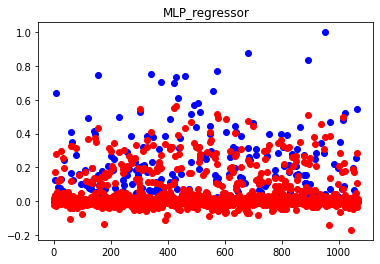

In [ ]:
plotGraph(y_test,y_pred,'MLP_regressor')

### Kernel Ridge Regression

In [ ]:
X = new_df.drop(['Egap'],axis=1)
y = new_df['Egap'].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X= sc.fit_transform(X)
y = MinMaxScaler().fit_transform(np.array(y).reshape(-1,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

In [ ]:
from sklearn.linear_model import  Ridge

In [ ]:
ridge =Ridge(alpha=10)

In [ ]:
model=ridge.fit(X_train,y_train)

In [ ]:
model.coef_

array([[ 5.49426661e-03,  2.02706057e-03, -8.52973321e-03,
        -6.90684589e-03,  3.56690029e-02, -3.87946685e-03,
         8.05002115e-03, -2.74124929e-02,  1.08904068e-02,
        -1.77711583e-02, -4.19467362e-03, -1.01199444e-02,
         8.56042777e-03, -3.27721593e-02, -1.17988613e-02,
         3.79332464e-03, -2.07881302e-03, -5.60407540e-03,
         0.00000000e+00,  1.28923515e-02,  2.35131868e-03,
        -1.89062551e-02, -1.05128140e-02,  1.77976638e-02,
         1.13676633e-02,  3.16327232e-02,  1.13671774e-02,
        -3.85084283e-02, -2.59720855e-03,  1.38883376e-02,
        -1.30596715e-03, -1.00447837e-02, -3.48755302e-04,
        -2.37198560e-04, -1.07340976e-03,  3.21235782e-04,
         4.15702211e-03, -3.73812042e-03,  3.30307377e-03,
        -5.64597787e-04, -1.00341057e-03, -9.96269813e-07,
        -3.58435535e-04,  3.58435535e-04]])

In [ ]:
model.intercept_


array([0.04364547])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
N = len(y_test) 
k =44
print('R2score=' +str(score))

R2score=0.5598226775976815


In [ ]:
def ridge_fit (features,labels,to_pred,alpha):
  ridge =Ridge(alpha)
  model=ridge.fit(features,labels)
  y_pred = model.predict(to_pred)
  return  y_pred

In [ ]:
from sklearn.metrics import mean_absolute_error

errors=[]
alphas =[]
i=0
while i<11:
  i+=0.1
  alphas.append(i)
  

In [ ]:
for a in alphas:
  new = ridge_fit(X_train,y_train,X_test,a)
  errors.append(mean_absolute_error(y_test,new))

In [ ]:
best = (errors.index(min(errors)))
print(alphas[best])

11.099999999999977


In [ ]:
y_pred = ridge_fit (X_train,y_train,X_test,11.099999999999977)

R2score =0.5597877906221579


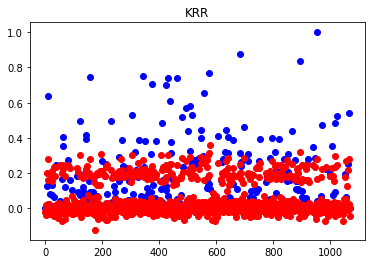

In [ ]:
score = r2_score(y_test,y_pred)
N = len(y_test) 
k =44
print('R2score =' +str(score))
plotGraph(y_test,y_pred,'KRR')